In [489]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [490]:
mkt = pd.read_csv(r"C:\Users\pedro\Desktop\Ironhack\lab-customer-analysis-round-3\files_for_lab\csv_files\marketing_customer_analysis.csv")
mkt

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [491]:
mkt.shape

(9134, 24)

In [492]:
mkt.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [493]:
cols = []
for i in range(len(mkt.columns)):
    cols.append(mkt.columns[i].lower().replace(' ','_'))

mkt.columns = cols
mkt

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [494]:
mkt['response'].describe()

count     9134
unique       2
top         No
freq      7826
Name: response, dtype: object

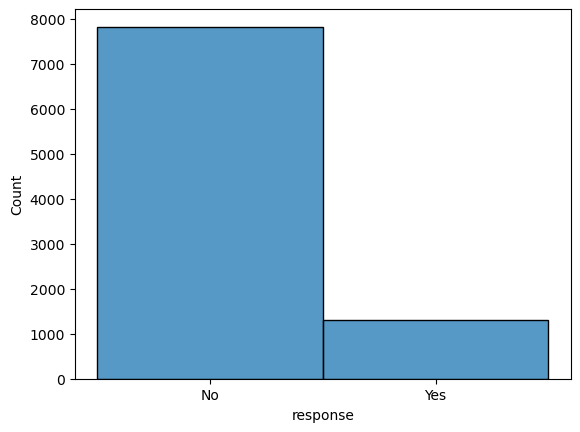

In [495]:
#Show a plot of the total number of responses.

sns.histplot(mkt['response'])
plt.show()


In [496]:
mkt.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In [497]:
resp_by_channel=mkt.groupby(['sales_channel','response'], as_index=False)['response'].size()

resp_by_channel.rename(columns={'size': 'response_count'}, inplace=True)

resp_by_channel

,sales_channel,response,response_count
0,Agent,No,2811
1,Agent,Yes,666
2,Branch,No,2273
3,Branch,Yes,294
4,Call Center,No,1573
5,Call Center,Yes,192
6,Web,No,1169
7,Web,Yes,156


In [498]:
resp_by_channel_total=resp_by_channel.groupby(['sales_channel'], as_index=False)['response_count'].sum()
resp_by_channel_total

,sales_channel,response_count
0,Agent,3477
1,Branch,2567
2,Call Center,1765
3,Web,1325


In [499]:
resp_by_channel_all=pd.merge(resp_by_channel,resp_by_channel_total,on='sales_channel',how='outer',suffixes=('_by_response_type','_by_channel'))
resp_by_channel_all

,sales_channel,response,response_count_by_response_type,response_count_by_channel
0,Agent,No,2811,3477
1,Agent,Yes,666,3477
2,Branch,No,2273,2567
3,Branch,Yes,294,2567
4,Call Center,No,1573,1765
5,Call Center,Yes,192,1765
6,Web,No,1169,1325
7,Web,Yes,156,1325


In [500]:
resp_by_channel_all['response_rate_by_channel']=resp_by_channel_all['response_count_by_response_type']/resp_by_channel_all['response_count_by_channel']
resp_by_channel_all

,sales_channel,response,response_count_by_response_type,response_count_by_channel,response_rate_by_channel
0,Agent,No,2811,3477,0.808456
1,Agent,Yes,666,3477,0.191544
2,Branch,No,2273,2567,0.885469
3,Branch,Yes,294,2567,0.114531
4,Call Center,No,1573,1765,0.891218
5,Call Center,Yes,192,1765,0.108782
6,Web,No,1169,1325,0.882264
7,Web,Yes,156,1325,0.117736


In [501]:
resp_by_channel_final=resp_by_channel_all[resp_by_channel_all['response']=='Yes']
resp_by_channel_final


,sales_channel,response,response_count_by_response_type,response_count_by_channel,response_rate_by_channel
1,Agent,Yes,666,3477,0.191544
3,Branch,Yes,294,2567,0.114531
5,Call Center,Yes,192,1765,0.108782
7,Web,Yes,156,1325,0.117736


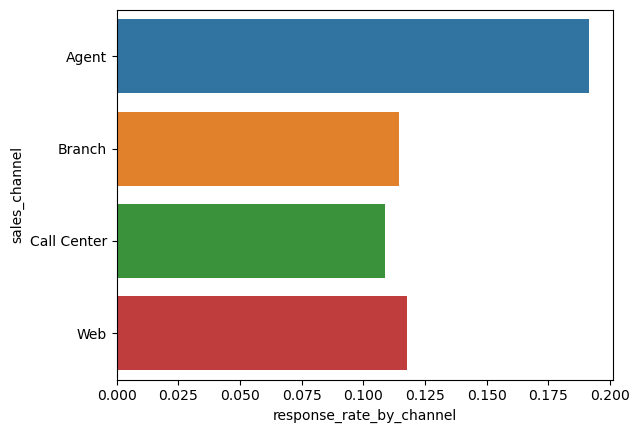

In [502]:
#Show a plot of the response rate by the sales channel.

sns.barplot(y=resp_by_channel_final['sales_channel'],x=resp_by_channel_final['response_rate_by_channel'])
plt.show()

In [503]:
mkt['total_claim_amount'].describe()


count    9134.000000
mean      434.088794
std       290.500092
min         0.099007
25%       272.258244
50%       383.945434
75%       547.514839
max      2893.239678
Name: total_claim_amount, dtype: float64

In [507]:
category = pd.cut(mkt.total_claim_amount,bins=[0,150,300,450,600,3000],labels=['<150','150-300','300-450','450-600','>600'])
mkt.insert(22,'total_claim_amount_category',category)
mkt['total_claim_amount_category'].describe()

count        9134
unique          5
top       300-450
freq         2713
Name: total_claim_amount_category, dtype: object

In [508]:
resp_by_claim_amount=mkt.groupby(['total_claim_amount_category','response'], as_index=False)['response'].size()

resp_by_claim_amount.rename(columns={'size': 'response_count'}, inplace=True)

resp_by_claim_amount

,total_claim_amount_category,response,response_count
0,<150,No,1201
1,<150,Yes,114
2,150-300,No,1248
3,150-300,Yes,144
4,300-450,No,2257
5,300-450,Yes,456
6,450-600,No,1534
7,450-600,Yes,372
8,>600,No,1586
9,>600,Yes,222


In [509]:
resp_by_claim_amount_total=resp_by_claim_amount.groupby(['total_claim_amount_category'], as_index=False)['response_count'].sum()
resp_by_claim_amount_total

,total_claim_amount_category,response_count
0,<150,1315
1,150-300,1392
2,300-450,2713
3,450-600,1906
4,>600,1808


In [510]:
resp_by_claim_amount_all=pd.merge(resp_by_claim_amount,resp_by_claim_amount_total,on='total_claim_amount_category',how='outer',suffixes=('_by_response_type','_by_claim_amount'))
resp_by_claim_amount_all

,total_claim_amount_category,response,response_count_by_response_type,response_count_by_claim_amount
0,<150,No,1201,1315
1,<150,Yes,114,1315
2,150-300,No,1248,1392
3,150-300,Yes,144,1392
4,300-450,No,2257,2713
5,300-450,Yes,456,2713
6,450-600,No,1534,1906
7,450-600,Yes,372,1906
8,>600,No,1586,1808
9,>600,Yes,222,1808


In [511]:
resp_by_claim_amount_all['response_rate_by_claim_amount']=resp_by_claim_amount_all['response_count_by_response_type']/resp_by_claim_amount_all['response_count_by_claim_amount']
resp_by_claim_amount_all

,total_claim_amount_category,response,response_count_by_response_type,response_count_by_claim_amount,response_rate_by_claim_amount
0,<150,No,1201,1315,0.913308
1,<150,Yes,114,1315,0.086692
2,150-300,No,1248,1392,0.896552
3,150-300,Yes,144,1392,0.103448
4,300-450,No,2257,2713,0.831920
5,300-450,Yes,456,2713,0.168080
6,450-600,No,1534,1906,0.804827
7,450-600,Yes,372,1906,0.195173
8,>600,No,1586,1808,0.877212
9,>600,Yes,222,1808,0.122788


In [512]:
resp_by_claim_amount_final=resp_by_claim_amount_all[resp_by_claim_amount_all['response']=='Yes']
resp_by_claim_amount_final

,total_claim_amount_category,response,response_count_by_response_type,response_count_by_claim_amount,response_rate_by_claim_amount
1,<150,Yes,114,1315,0.086692
3,150-300,Yes,144,1392,0.103448
5,300-450,Yes,456,2713,0.168080
7,450-600,Yes,372,1906,0.195173
9,>600,Yes,222,1808,0.122788


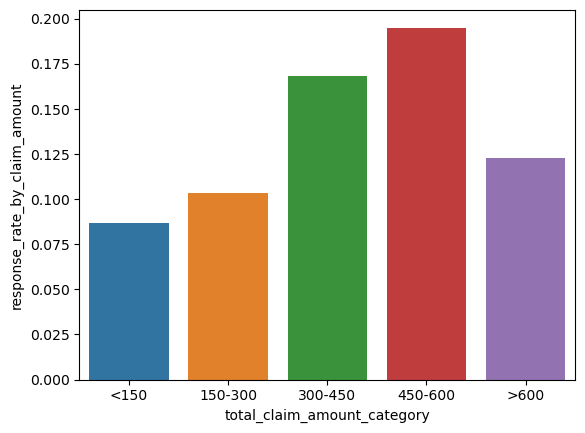

In [513]:
#Show a plot of the response rate by the total claim amount.

sns.barplot(x=resp_by_claim_amount_final['total_claim_amount_category'],y=resp_by_claim_amount_final['response_rate_by_claim_amount'])
plt.show()

In [442]:
mkt['income'].describe()

count     9134.000000
mean     37657.380009
std      30379.904734
min          0.000000
25%          0.000000
50%      33889.500000
75%      62320.000000
max      99981.000000
Name: income, dtype: float64

In [514]:
mkt['income_category'] = np.where(mkt['income']==0,'0',np.where(mkt['income']<25000,']0-25000]',np.where(mkt['income']<50000,']25000-50000]',np.where(mkt['income']<75000,']50000-75000]',']75000-100000]'))))

mkt['income_category'].describe()

count              9134
unique                5
top       ]25000-50000]
freq               2333
Name: income_category, dtype: object

In [515]:
resp_by_income=mkt.groupby(['income_category','response'], as_index=False)['response'].size()

resp_by_income.rename(columns={'size': 'response_count'}, inplace=True)

resp_by_income

,income_category,response,response_count
0,0,No,2119
1,0,Yes,198
2,]0-25000],No,912
3,]0-25000],Yes,300
4,]25000-50000],No,1991
5,]25000-50000],Yes,342
6,]50000-75000],No,1625
7,]50000-75000],Yes,300
8,]75000-100000],No,1179
9,]75000-100000],Yes,168


In [516]:
resp_by_income_total=resp_by_income.groupby(['income_category'], as_index=False)['response_count'].sum()
resp_by_income_total

,income_category,response_count
0,0,2317
1,]0-25000],1212
2,]25000-50000],2333
3,]50000-75000],1925
4,]75000-100000],1347


In [517]:
resp_by_income_all=pd.merge(resp_by_income,resp_by_income_total,on='income_category',how='outer',suffixes=('_by_response_type','_by_income'))
resp_by_income_all

,income_category,response,response_count_by_response_type,response_count_by_income
0,0,No,2119,2317
1,0,Yes,198,2317
2,]0-25000],No,912,1212
3,]0-25000],Yes,300,1212
4,]25000-50000],No,1991,2333
5,]25000-50000],Yes,342,2333
6,]50000-75000],No,1625,1925
7,]50000-75000],Yes,300,1925
8,]75000-100000],No,1179,1347
9,]75000-100000],Yes,168,1347


In [518]:
resp_by_income_all['response_rate_by_income']=resp_by_income_all['response_count_by_response_type']/resp_by_income_all['response_count_by_income']
resp_by_income_all

,income_category,response,response_count_by_response_type,response_count_by_income,response_rate_by_income
0,0,No,2119,2317,0.914545
1,0,Yes,198,2317,0.085455
2,]0-25000],No,912,1212,0.752475
3,]0-25000],Yes,300,1212,0.247525
4,]25000-50000],No,1991,2333,0.853408
5,]25000-50000],Yes,342,2333,0.146592
6,]50000-75000],No,1625,1925,0.844156
7,]50000-75000],Yes,300,1925,0.155844
8,]75000-100000],No,1179,1347,0.875278
9,]75000-100000],Yes,168,1347,0.124722


In [519]:
resp_by_income_final=resp_by_income_all[resp_by_income_all['response']=='Yes']
resp_by_income_final

,income_category,response,response_count_by_response_type,response_count_by_income,response_rate_by_income
1,0,Yes,198,2317,0.085455
3,]0-25000],Yes,300,1212,0.247525
5,]25000-50000],Yes,342,2333,0.146592
7,]50000-75000],Yes,300,1925,0.155844
9,]75000-100000],Yes,168,1347,0.124722


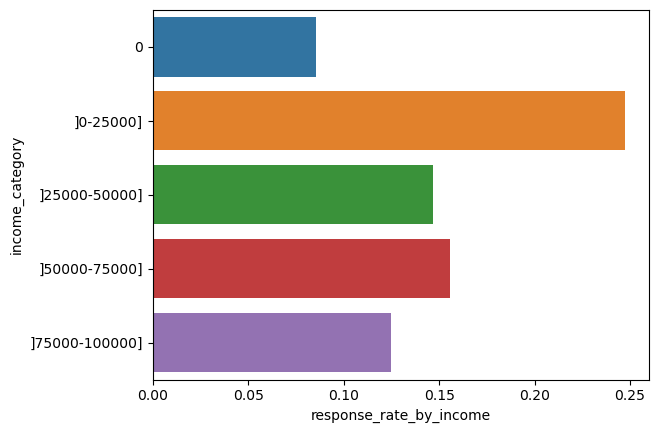

In [521]:
#Show a plot of the response rate by income.

sns.barplot(y=resp_by_income_final['income_category'],x=resp_by_income_final['response_rate_by_income'])
plt.show()